In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
data = sns.load_dataset('mpg')
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration   
0  18.0          8         307.0       130.0    3504          12.0  \
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [10]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
data['horsepower'] = data['horsepower'].fillna(0)

In [44]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [45]:
y = data['mpg']   ##### Dependent Variable
X = data[['cylinders', 'displacement', 'horsepower', 'weight','acceleration']] #### Independent Variable

In [46]:
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=1234)

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
X_pred_train = lr.predict(X_train)
#X_pred_train

In [49]:
print("The training accuracy is  - ")
r2_score(y_train,X_pred_train)

The training accuracy is  - 


0.7002115130722893

In [50]:
X_pred_test = lr.predict(X_test)


print("The test accuracy is  - ")
r2_score(y_test,X_pred_test)

In [52]:
ridge = Ridge()

In [53]:
ridge.fit(X_train,y_train)

Ridge()

In [54]:
X_pred_ridge_test = ridge.predict(X_test)
X_pred_ridge_test

array([14.0016048 ,  7.27698276, 16.51338709, 30.31388851, 27.0098333 ,
       29.8527862 , 16.14704875, 28.29364328, 11.08037683, 18.7848834 ,
       26.68478633, 16.73326952, 28.13696968, 31.44752884, 25.73805146,
       11.3682284 , 20.14821063, 24.52588947, 19.43647869, 31.03851183,
       32.45212293, 18.16831262, 27.16189062, 20.64057064,  9.79817653,
       24.01540667, 33.50615099, 25.36468184, 28.3949857 , 29.58479578,
       13.37675551, 16.92156476, 27.11469718, 28.54925971, 22.46295195,
       24.5554136 , 20.51531891, 12.5695009 , 24.64603377, 18.44971817,
        8.92968589, 29.28687267, 31.96206065, 12.26848619, 29.55348662,
       23.48548103, 23.59918761, 24.94157715, 25.60823959, 26.72827861,
       27.61259977, 11.97377733, 26.59072152, 23.10279163, 31.07264381,
       29.06342159, 19.30054737, 23.41964223, 14.23661147, 25.51616124,
       22.05259578, 14.33570743,  7.81976261, 24.76788702, 14.97341784,
       16.4580674 , 31.53109238, 30.68721542, 12.47751686, 30.15

In [55]:
print("The ridge test accuracy is  - ")
r2_score(y_test,X_pred_ridge_test)

The ridge test accuracy is  - 


0.7139536370146131

In [56]:
lasso = Lasso()

In [57]:
lasso.fit(X_train,y_train)

Lasso()

In [58]:
X_pred_lasso_test = lasso.predict(X_test)
X_pred_lasso_test

array([14.01767882,  7.18691241, 16.25679129, 29.82175687, 26.93902967,
       29.88109617, 16.35885566, 28.28843636, 10.82596226, 18.34940161,
       26.66964897, 17.18539334, 28.00341468, 31.30309522, 25.78816626,
       11.10410389, 19.84737431, 25.00678718, 19.32520883, 31.18327376,
       32.24079441, 17.81228602, 27.14949367, 20.15624946,  9.67246591,
       24.12758483, 33.65263929, 25.02941704, 28.47849167, 29.64850827,
       13.5276563 , 17.33378595, 27.17854399, 28.51618624, 22.37093913,
       24.01647806, 20.8932493 , 12.63957933, 24.33374866, 17.79798251,
        8.79085332, 29.36640686, 32.12731671, 12.52897708, 29.70061511,
       23.62946506, 23.49868671, 24.85304837, 25.77949378, 26.62873723,
       27.61325625, 11.86848809, 26.43021657, 22.91456495, 31.10191785,
       29.13962904, 18.93605293, 23.21268746, 14.45654568, 25.59534187,
       21.83704213, 14.55359026,  7.5094686 , 24.47018866, 15.26892053,
       16.67150138, 31.44722319, 30.60742684, 12.51631974, 30.30

In [59]:
print("The lasso test accuracy is  - ")
r2_score(y_test,X_pred_lasso_test)

The lasso test accuracy is  - 


0.7150242252415154

In [60]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [63]:
sc =  StandardScaler()

In [65]:
X_sc = sc.fit_transform(X)
X_sc

array([[ 1.49819126,  1.0906037 ,  0.67394962,  0.63086987, -1.29549834],
       [ 1.49819126,  1.5035143 ,  1.54418676,  0.85433297, -1.47703779],
       [ 1.49819126,  1.19623199,  1.17122799,  0.55047045, -1.65857724],
       ...,
       [-0.85632057, -0.56103873, -0.46979062, -0.79858454, -1.4407299 ],
       [-0.85632057, -0.70507731, -0.59411021, -0.40841088,  1.10082237],
       [-0.85632057, -0.71467988, -0.51951845, -0.29608816,  1.39128549]])

In [81]:
X_train, X_test, y_train,y_test = train_test_split(X_mx,y,train_size=0.80,random_state=1234)

In [82]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
X_pred_train = lr.predict(X_train)

In [84]:
print("The training accuracy is  - ")
r2_score(y_train,X_pred_train)

The training accuracy is  - 


0.7002115130722893

In [85]:
X_pred_test = lr.predict(X_test)
print("The test accuracy is  - ")
r2_score(y_test,X_pred_test)

The test accuracy is  - 


0.7139508903048495

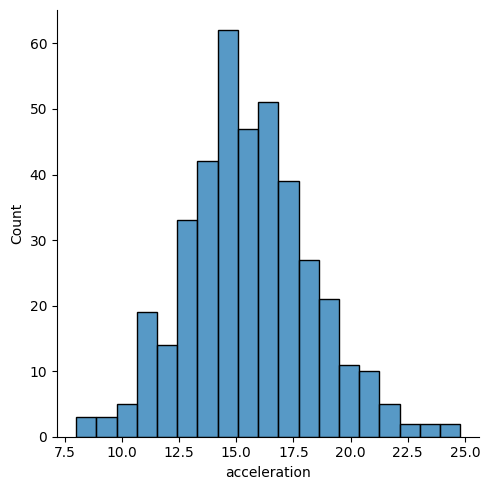

In [77]:
sns.displot(x = data['acceleration'])

In [79]:
mx = MinMaxScaler()

In [80]:
X_mx = mx.fit_transform(X)
X_mx

array([[1.        , 0.61757106, 0.56521739, 0.5361497 , 0.23809524],
       [1.        , 0.72868217, 0.7173913 , 0.58973632, 0.20833333],
       [1.        , 0.64599483, 0.65217391, 0.51686986, 0.17857143],
       ...,
       [0.2       , 0.17312661, 0.36521739, 0.19336547, 0.21428571],
       [0.2       , 0.13436693, 0.34347826, 0.2869294 , 0.63095238],
       [0.2       , 0.13178295, 0.35652174, 0.31386447, 0.67857143]])

In [ ]:
##### After Break 11:40